In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
tf.config.list_physical_devices('GPU')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall

In [2]:
df = pd.read_parquet('clean_data.pqt')

In [3]:
X= df['comment_text']
y= df.drop(['id','comment_text'], axis=1)
print(y)

X_train, X_valid, ytrain, yvalid = train_test_split(X,y,test_size=.3, random_state=77)
print(X_train.shape[0])
print(X_valid.shape[0]) 

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]
111699
47872


In [4]:
MAX_VOCAB_SIZE = 200000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid = tokenizer.texts_to_sequences(X_valid)

In [5]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V)

150507


In [6]:
data_train = pad_sequences(sequences_train)
print(data_train.shape)
T= data_train.shape[1]
data_valid = pad_sequences(sequences_valid, maxlen=T)
print(data_valid.shape)

(111699, 1250)
(47872, 1250)


In [7]:
X_train.to_pickle('data_train.pkl')
X_valid.to_pickle('data_valid.pkl')
ytrain.to_pickle('ytrain.pkl')
yvalid.to_pickle('yvalid.pkl')

In [8]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model= Model(i,x)

In [9]:
def history_plots(redux, metric):
    valid = "val_"+metric
    plt.plot(redux.history[metric], label=metric)
    plt.plot(redux.history[valid], label=valid)
    plt.legend()
    plt.show()

In [10]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

r = model.fit(data_train, ytrain, epochs= 25, batch_size=100, validation_data=(data_valid, yvalid))

Epoch 1/25
1117/1117 [==============================] - 76s 64ms/step - loss: 523591776.0000 - accuracy: 0.2424 - precision: 0.0461 - recall: 0.2034 - val_loss: 4129283072.0000 - val_accuracy: 0.0031 - val_precision: 0.0530 - val_recall: 0.2406
Epoch 2/25
1117/1117 [==============================] - 71s 64ms/step - loss: 24722579456.0000 - accuracy: 0.2482 - precision: 0.0465 - recall: 0.2111 - val_loss: 40377483264.0000 - val_accuracy: 0.0031 - val_precision: 0.0530 - val_recall: 0.2406
Epoch 3/25
1117/1117 [==============================] - 71s 64ms/step - loss: 182237839360.0000 - accuracy: 0.2486 - precision: 0.0466 - recall: 0.2119 - val_loss: 343267213312.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0100 - val_recall: 0.0453
Epoch 4/25
1117/1117 [==============================] - 71s 64ms/step - loss: 603859058688.0000 - accuracy: 0.2485 - precision: 0.0455 - recall: 0.2069 - val_loss: 1330216173568.0000 - val_accuracy: 0.0031 - val_precision: 0.0530 - val_recall: 0.2406
Ep

In [11]:
def f1_derive(hist=r,prc='precision',rcl='recall'):
    vp= 'val_'+prc
    v_re= 'val_'+rcl
    CH_hist= pd.DataFrame(hist.history)
    CH_hist['f1'] =(2*CH_hist[prc]*CH_hist[rcl])/(CH_hist[prc]+CH_hist[rcl])
    CH_hist['val_f1'] =(2*CH_hist[vp]*CH_hist[vp])/(CH_hist[vp]+CH_hist[vp])
    CH_hist.fillna(0,inplace=True)

    plt.plot(CH_hist['f1'], label='f1')
    plt.plot(CH_hist['val_f1'], label='val_f1')
    plt.legend()
    plt.show()

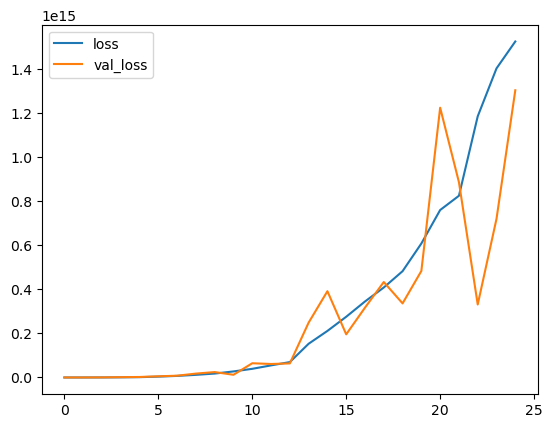

In [12]:
history_plots(r,'loss')

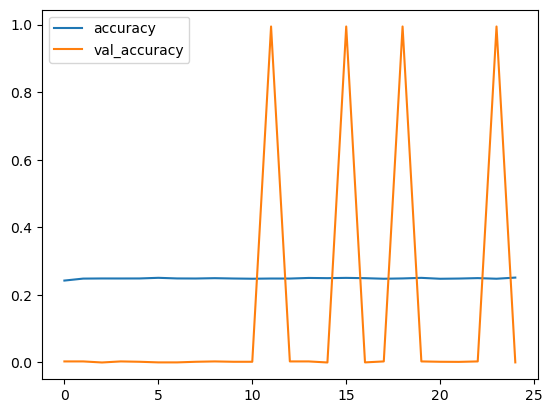

In [13]:
history_plots(r,'accuracy')

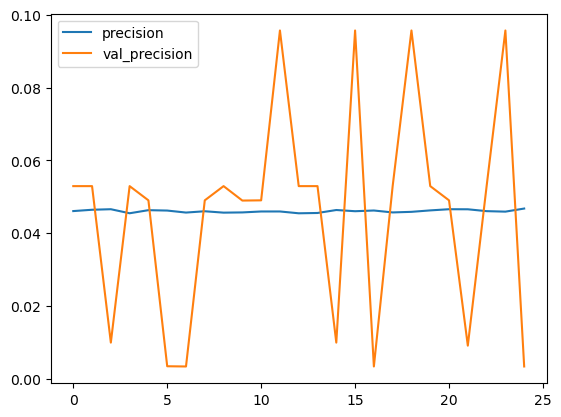

In [14]:
history_plots(r,'precision')

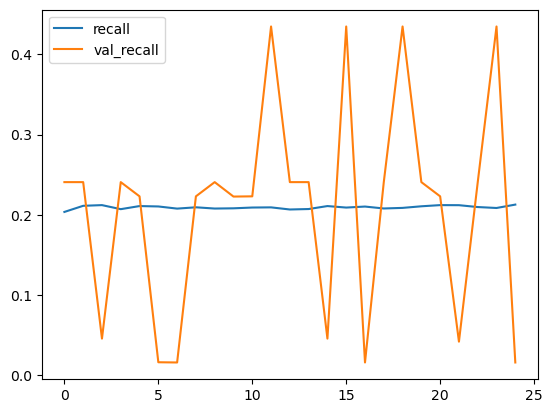

In [15]:
history_plots(r,'recall')

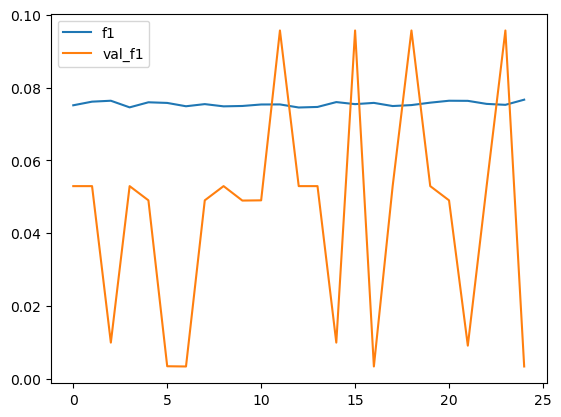

In [16]:
f1_derive(r,'precision','recall')

In [17]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model2= Model(i,x)

In [18]:
model2.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

q = model2.fit(data_train, ytrain, epochs= 25, batch_size=100, validation_data=(data_valid, yvalid))

Epoch 1/25
1117/1117 [==============================] - 44s 39ms/step - loss: 231814.9375 - accuracy: 0.2837 - precision: 0.0462 - recall: 0.1981 - val_loss: 429021.4688 - val_accuracy: 0.0021 - val_precision: 0.0490 - val_recall: 0.2229
Epoch 2/25
1117/1117 [==============================] - 43s 39ms/step - loss: 5766731.5000 - accuracy: 0.2485 - precision: 0.0456 - recall: 0.2072 - val_loss: 4436145.5000 - val_accuracy: 0.9943 - val_precision: 0.0957 - val_recall: 0.4350
Epoch 3/25
1117/1117 [==============================] - 43s 39ms/step - loss: 28964424.0000 - accuracy: 0.2489 - precision: 0.0463 - recall: 0.2108 - val_loss: 71348240.0000 - val_accuracy: 0.0031 - val_precision: 0.0530 - val_recall: 0.2406
Epoch 4/25
1117/1117 [==============================] - 43s 39ms/step - loss: 85914800.0000 - accuracy: 0.2487 - precision: 0.0463 - recall: 0.2104 - val_loss: 156761392.0000 - val_accuracy: 0.9943 - val_precision: 0.0957 - val_recall: 0.4350
Epoch 5/25
1117/1117 [===============

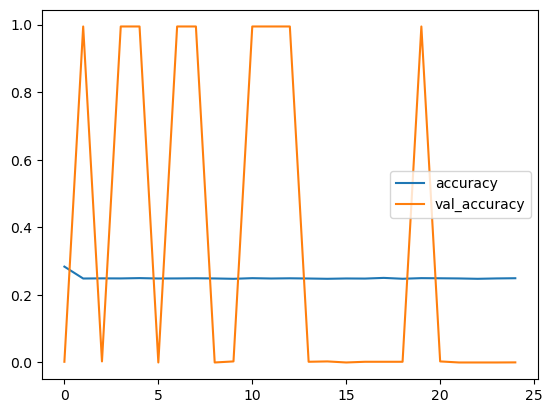

In [19]:
history_plots(q,'accuracy')

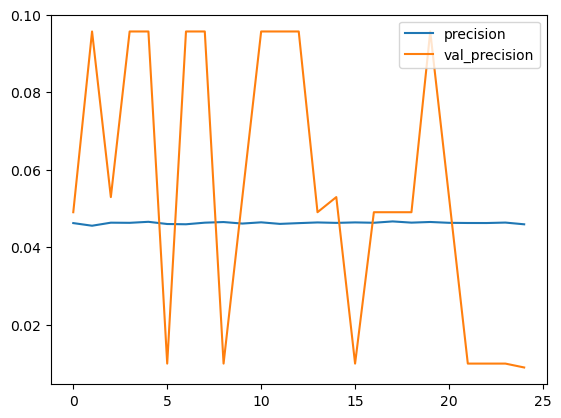

In [20]:
history_plots(q,'precision')

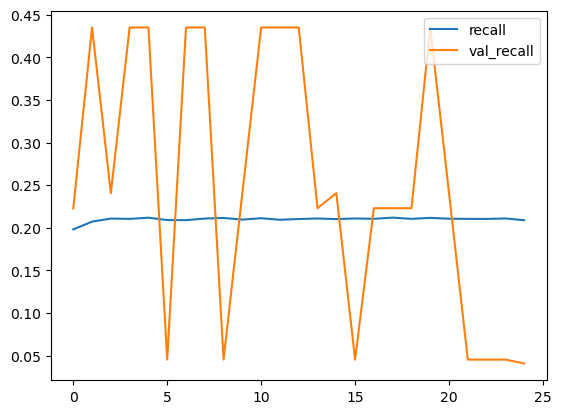

In [21]:
history_plots(q,'recall')

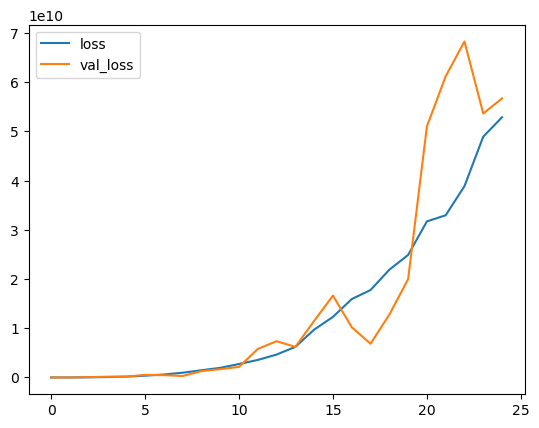

In [22]:
history_plots(q,'loss')

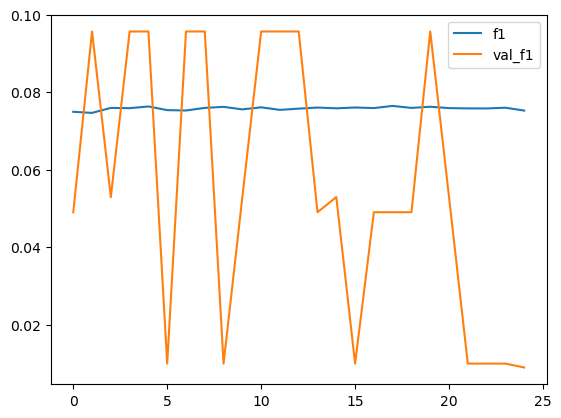

In [23]:
f1_derive(q,'precision','recall')

In [24]:
D=60
m=64
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [25]:
model3.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

s = model3.fit(data_train, ytrain, epochs= 25, batch_size=100, validation_data=(data_valid, yvalid))

Epoch 1/25
1117/1117 [==============================] - 144s 128ms/step - loss: 9318110208.0000 - accuracy: 0.2514 - precision: 0.0460 - recall: 0.2046 - val_loss: 113845575680.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0100 - val_recall: 0.0453
Epoch 2/25
1117/1117 [==============================] - 142s 127ms/step - loss: 421454446592.0000 - accuracy: 0.2493 - precision: 0.0454 - recall: 0.2064 - val_loss: 1099078762496.0000 - val_accuracy: 2.7156e-04 - val_precision: 0.0090 - val_recall: 0.0407
Epoch 3/25
1117/1117 [==============================] - 142s 127ms/step - loss: 2710278504448.0000 - accuracy: 0.2474 - precision: 0.0456 - recall: 0.2076 - val_loss: 3238390398976.0000 - val_accuracy: 0.9943 - val_precision: 0.0957 - val_recall: 0.4350
Epoch 4/25
1117/1117 [==============================] - 142s 128ms/step - loss: 10100890664960.0000 - accuracy: 0.2493 - precision: 0.0465 - recall: 0.2113 - val_loss: 25211302838272.0000 - val_accuracy: 0.0021 - val_precision: 0.0490 

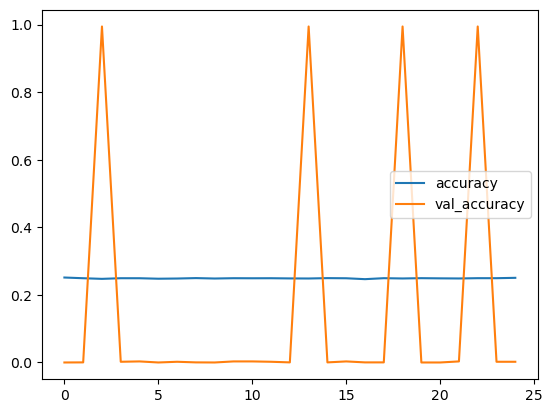

In [26]:
history_plots(s,'accuracy')

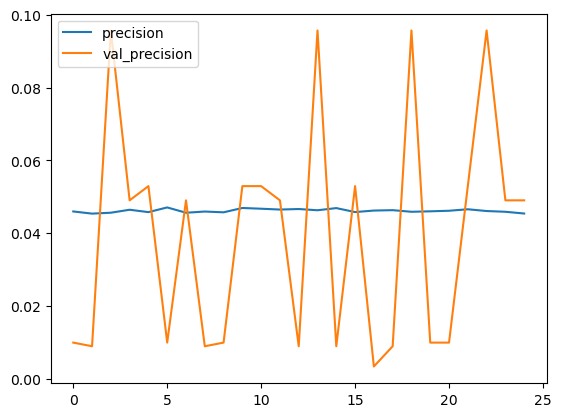

In [27]:
history_plots(s,'precision')

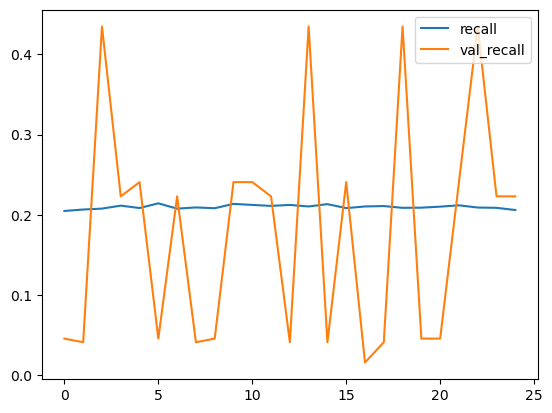

In [28]:
history_plots(s,'recall')

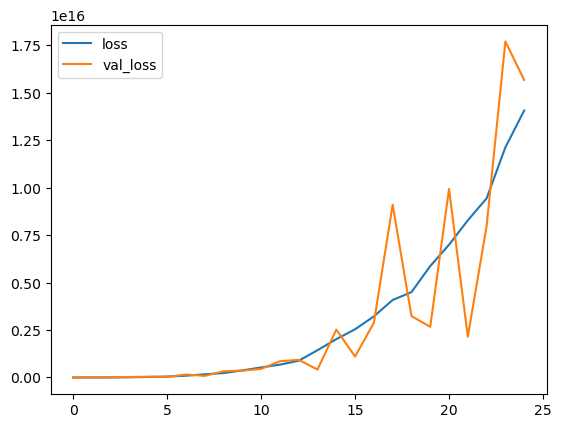

In [29]:
history_plots(s,'loss')

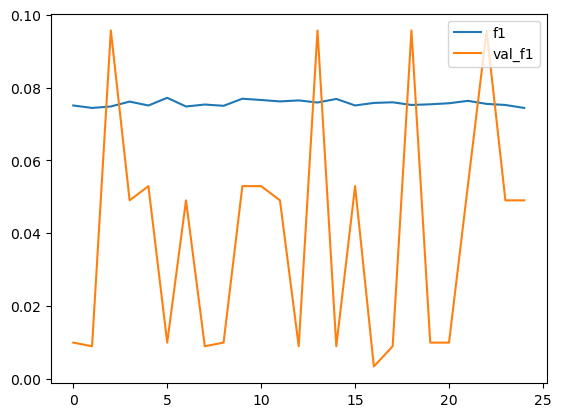

In [30]:
f1_derive(s,'precision','recall')

In [31]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='sigmoid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model= Model(i,x)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

f = model.fit(data_train, ytrain, epochs= 25, batch_size=100, validation_data=(data_valid, yvalid))

Epoch 1/25
1117/1117 [==============================] - 73s 65ms/step - loss: 0.3488 - accuracy: 0.9710 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3485 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
1117/1117 [==============================] - 72s 65ms/step - loss: 0.3474 - accuracy: 0.9924 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3466 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
1117/1117 [==============================] - 73s 65ms/step - loss: 0.3464 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3484 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
1117/1117 [==============================] - 72s 65ms/step - loss: 0.3457 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3453 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
1117/1117 [==

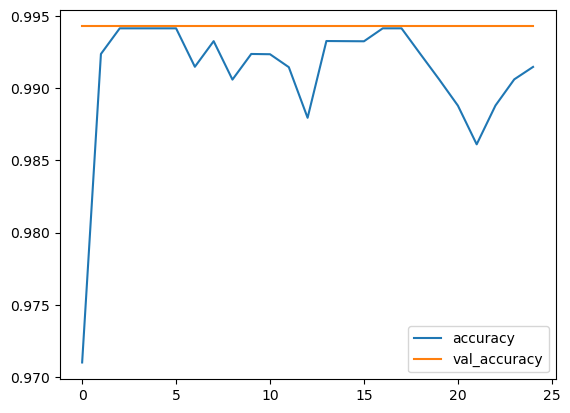

In [33]:
history_plots(f,'accuracy')

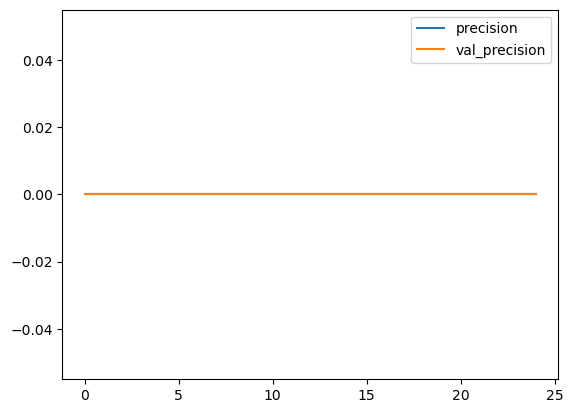

In [34]:
history_plots(f,'precision')

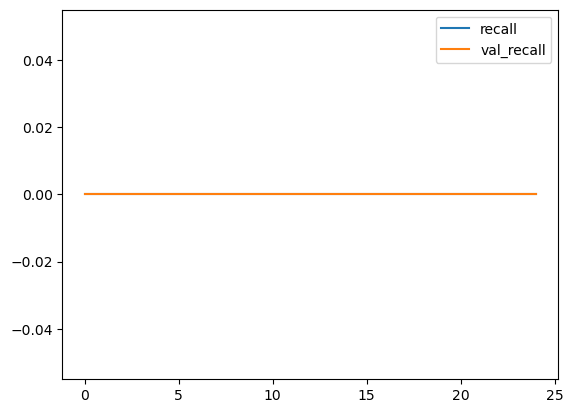

In [35]:
history_plots(f,'recall')

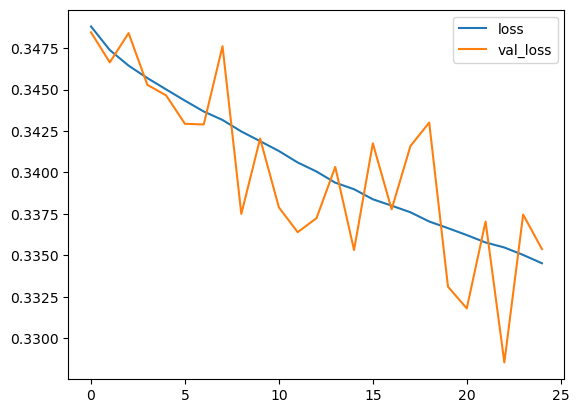

In [36]:
history_plots(f,'loss')

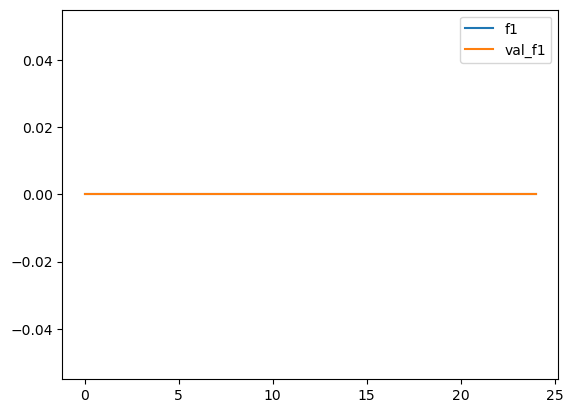

In [37]:
f1_derive(f,'precision','recall')

In [38]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='sigmoid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model9= Model(i,x)

In [39]:
from tensorflow.keras.optimizers import Adam
model9.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.0001), metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

g = model9.fit(data_train, ytrain, epochs= 25, batch_size=500, validation_data=(data_valid, yvalid))

Epoch 1/25
224/224 [==============================] - 36s 153ms/step - loss: 0.3707 - accuracy: 0.8429 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3653 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3645 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3664 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3674 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3663 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3660 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3658 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
224/224 [========

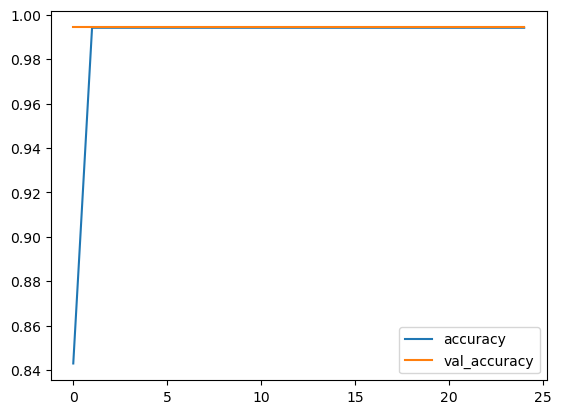

In [40]:
history_plots(g,'accuracy')

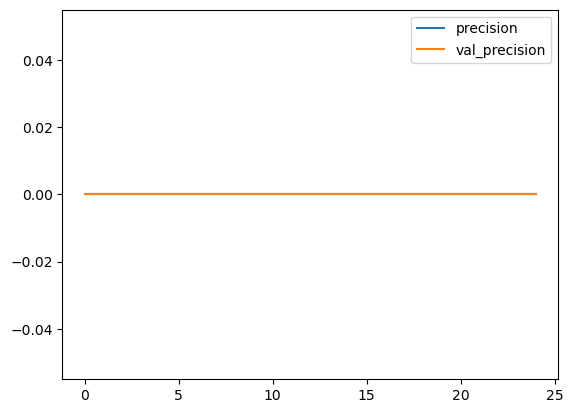

In [41]:
history_plots(g,'precision')

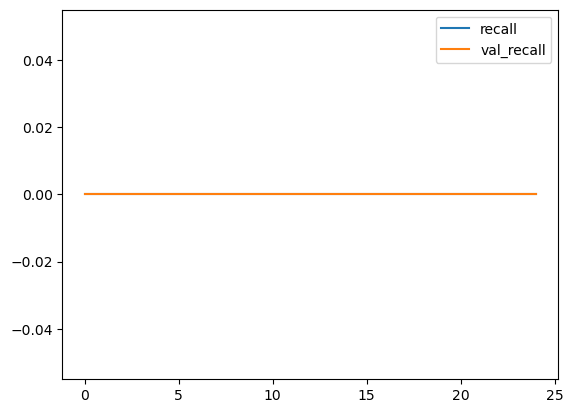

In [42]:
history_plots(g,'recall')

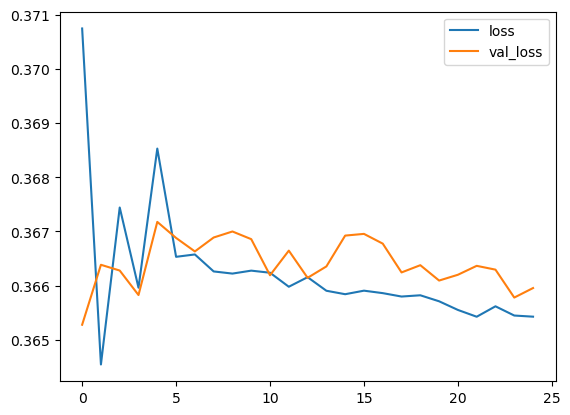

In [43]:
history_plots(g,'loss')

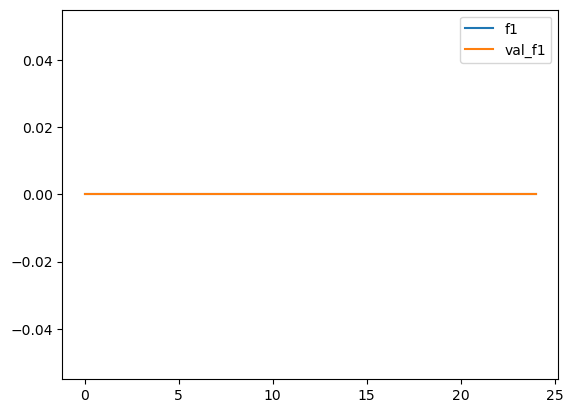

In [44]:
f1_derive(g,'precision','recall')

In [47]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='sigmoid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model8= Model(i,x)

In [49]:
from tensorflow.keras.optimizers import Adam
model8.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.0005), metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

h = model8.fit(data_train, ytrain, epochs= 25, batch_size=500, validation_data=(data_valid, yvalid))

Epoch 1/25
224/224 [==============================] - 35s 151ms/step - loss: 0.3683 - accuracy: 0.9098 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3683 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3692 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3680 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3684 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3678 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3680 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3688 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
224/224 [========

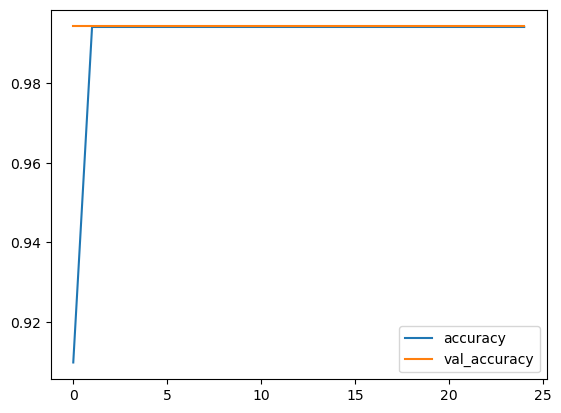

In [50]:
history_plots(h,'accuracy')

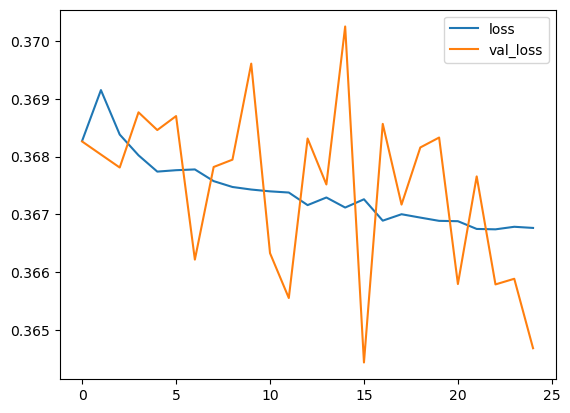

In [51]:
history_plots(h,'loss')

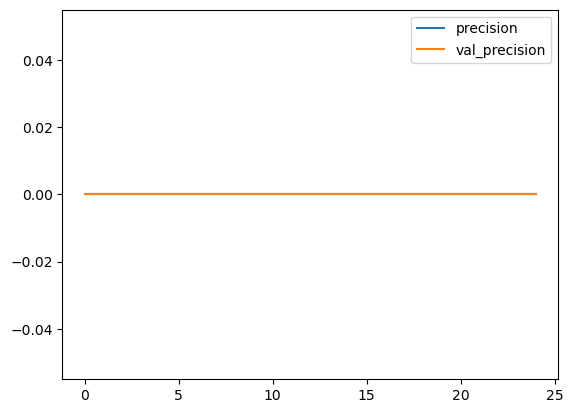

In [52]:
history_plots(h,'precision')

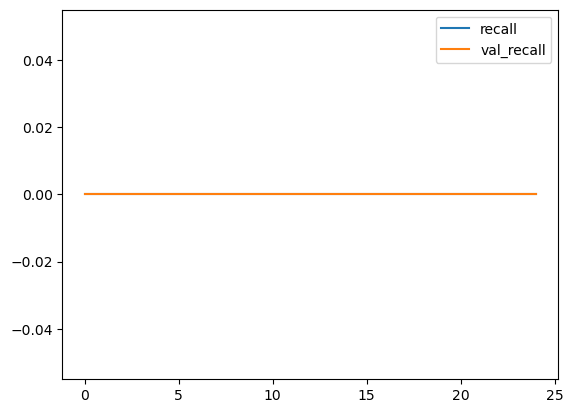

In [53]:
history_plots(h,'recall')

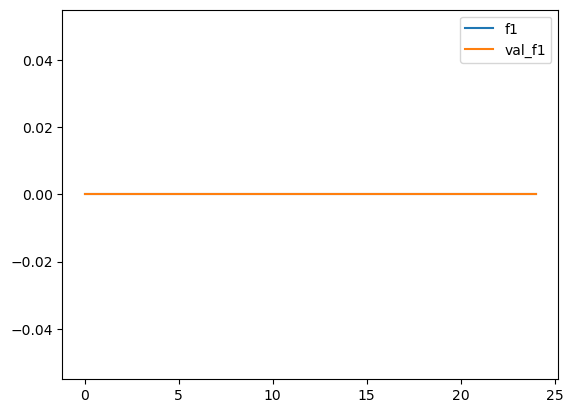

In [54]:
f1_derive(h)

In [55]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='sigmoid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model7= Model(i,x)

In [56]:
from tensorflow.keras.optimizers import Adam
model7.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.00005), metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

e = model7.fit(data_train, ytrain, epochs= 25, batch_size=500, validation_data=(data_valid, yvalid))

Epoch 1/25


224/224 [==============================] - 34s 151ms/step - loss: 0.3469 - accuracy: 0.6878 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3472 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3440 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3452 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
224/224 [==============================] - 34s 151ms/step - loss: 0.3461 - accuracy: 0.3526 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3436 - val_accuracy: 0.0021 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
224/224 [==============================] - 34s 151ms/step - loss: 0.3422 - accuracy: 0.9142 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3445 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
224/224 [===================

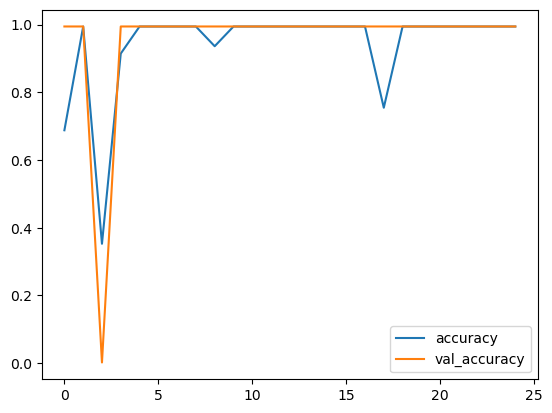

In [57]:
history_plots(e,'accuracy')

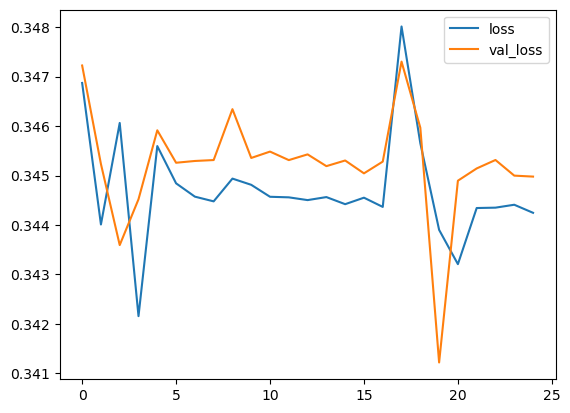

In [58]:
history_plots(e,'loss')

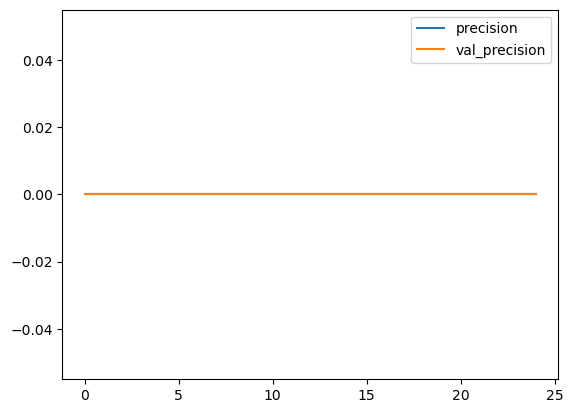

In [59]:
history_plots(e,'precision')

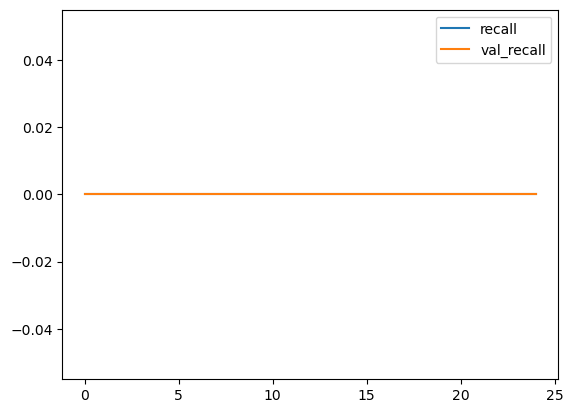

In [60]:
history_plots(e,'recall')

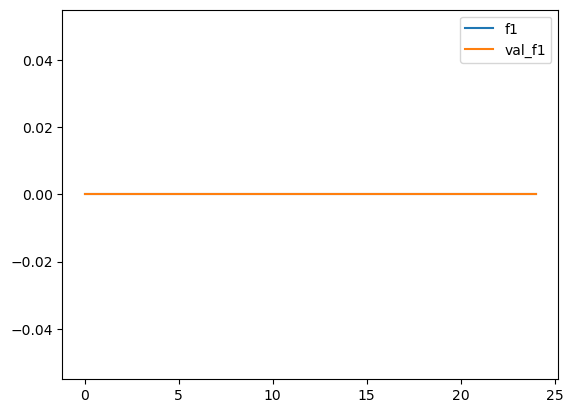

In [61]:
f1_derive(e)

In [62]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='sigmoid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model6= Model(i,x)

In [63]:

model6.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.00005), metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

k = model6.fit(data_train, ytrain, epochs= 25, batch_size=500, validation_data=(data_valid, yvalid))

Epoch 1/25
224/224 [==============================] - 35s 151ms/step - loss: 0.3789 - accuracy: 0.9008 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3647 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3626 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3632 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3656 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3715 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
224/224 [==============================] - 34s 150ms/step - loss: 0.3710 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3713 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
224/224 [========

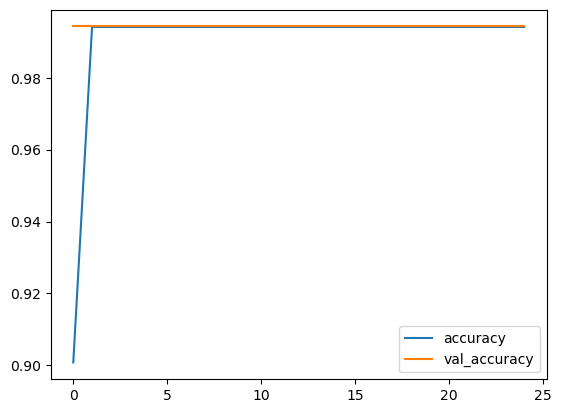

In [64]:
history_plots(k,'accuracy')

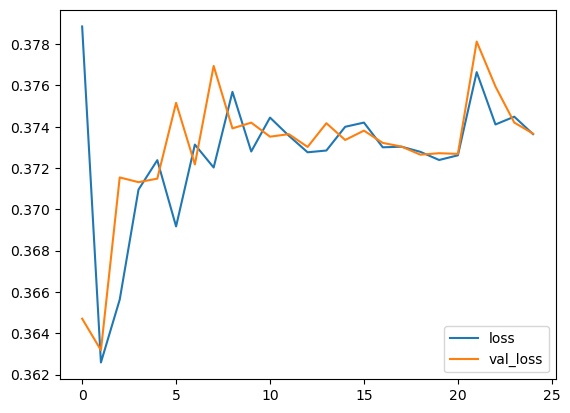

In [65]:
history_plots(k,'loss')

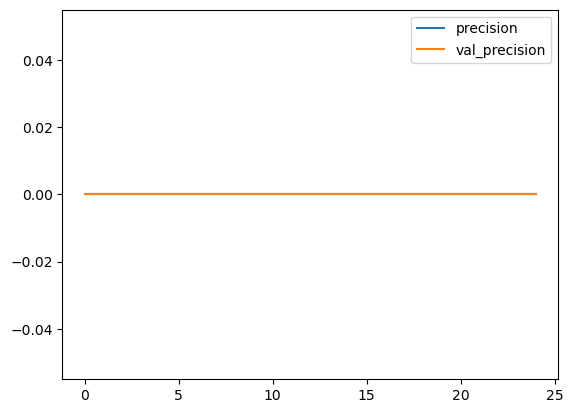

In [66]:
history_plots(k,'precision')

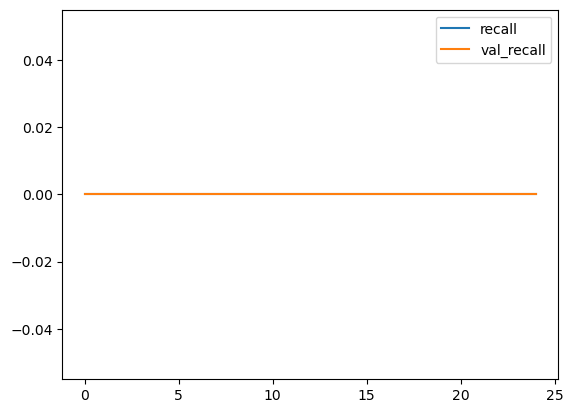

In [67]:
history_plots(k,'recall')

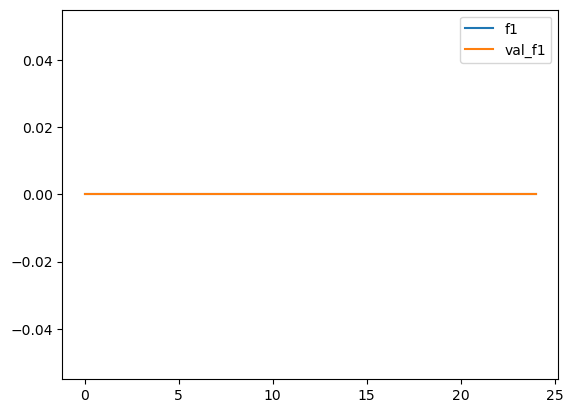

In [68]:
f1_derive(k)

Epoch 1/25
224/224 [==============================] - 34s 148ms/step - loss: 0.3742 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3725 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
224/224 [==============================] - 33s 148ms/step - loss: 0.3703 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3691 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
224/224 [==============================] - 33s 148ms/step - loss: 0.3672 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3665 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
224/224 [==============================] - 33s 147ms/step - loss: 0.3649 - accuracy: 0.9941 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3645 - val_accuracy: 0.9943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
224/224 [========

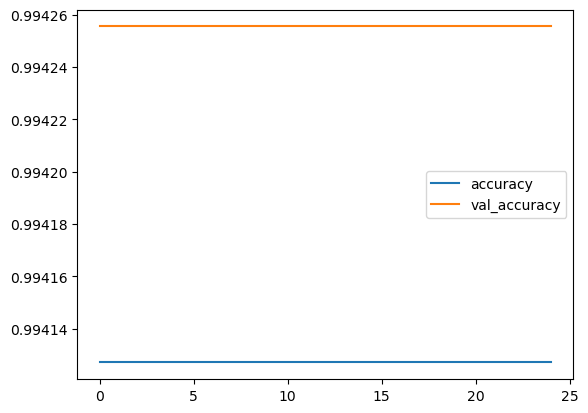

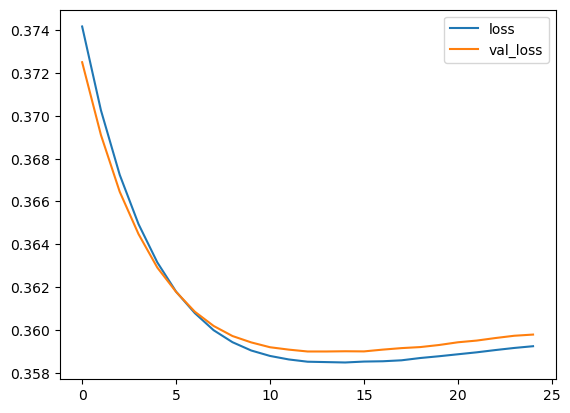

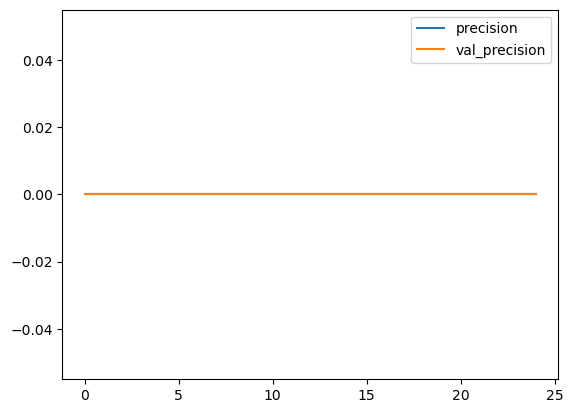

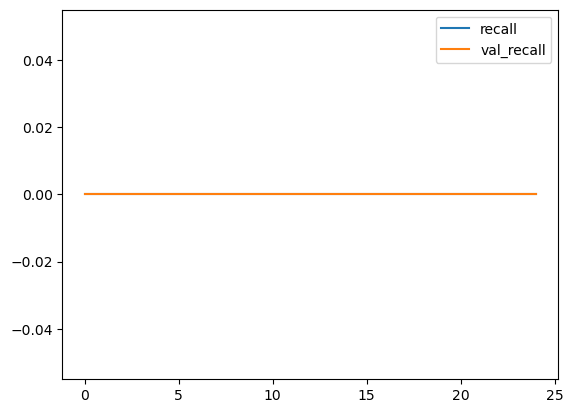

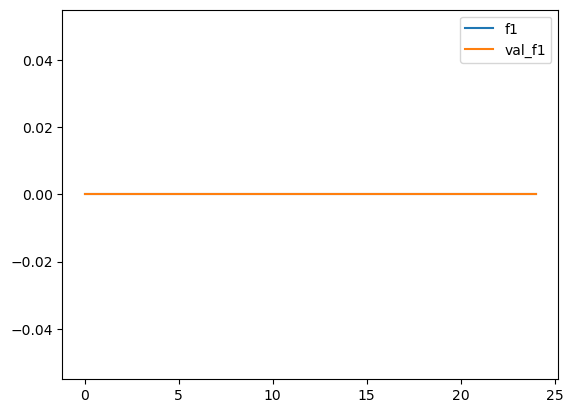

In [69]:
D=60
m=32
i= Input(shape=(T,))
x= Embedding(V+1, D)(i)
x= Conv1D(m, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*2, 3, activation='sigmoid')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*4, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x= Conv1D(m*8, 3, activation='sigmoid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

modela1= Model(i,x)
from tensorflow.keras.optimizers import SGD
modela1.compile(loss='categorical_crossentropy', optimizer= SGD(learning_rate=0.00005), metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

e = modela1.fit(data_train, ytrain, epochs= 25, batch_size=500, validation_data=(data_valid, yvalid))
history_plots(e,'accuracy')
history_plots(e,'loss')
history_plots(e,'precision')
history_plots(e,'recall')
f1_derive(e)